In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [12]:
# Load the data
data_filename = "data_no_nan.csv"
data_path = os.path.join('..', 'data', 'input', data_filename)
df = pd.read_csv(data_path)

# Calculate length in minutes
fs = 400  # Sampling rate in Hz
duration_mins = len(df) / (fs * 60)  # Convert samples to minutes

print(f"Dataset shape: {df.shape}")
print(f"Dataset duration: {duration_mins:.2f} minutes")
df.head()

Dataset shape: (28850, 16)
Dataset duration: 1.20 minutes


,NVC1001_23_002_01,NVC1001_23_002_02,NVC1001_23_002_03,NVC1001_23_002_04,NVC1001_23_002_05,NVC1001_23_002_06,NVC1001_23_002_07,NVC1001_23_002_08,NVC1001_23_002_09,NVC1001_23_002_10,NVC1001_23_002_11,NVC1001_23_002_12,NVC1001_23_002_13,NVC1001_23_002_14,NVC1001_23_002_15,NVC1001_23_002_16
0,-49.0,-112.0,-62.0,40.0,-121.0,-93.0,49.0,75.0,28.0,87.0,81.0,14.0,-99.0,50.0,117.0,5.0
1,-49.0,-120.0,-54.0,56.0,-122.0,-104.0,33.0,88.0,23.0,81.0,92.0,14.0,-104.0,43.0,121.0,20.0
2,-48.0,-126.0,-48.0,54.0,-128.0,-108.0,15.0,96.0,22.0,80.0,99.0,18.0,-107.0,35.0,122.0,45.0
3,-51.0,-129.0,-43.0,55.0,-130.0,-110.0,-8.0,92.0,22.0,82.0,100.0,18.0,-96.0,33.0,118.0,64.0
4,-52.0,-134.0,-41.0,54.0,-132.0,-107.0,-33.0,85.0,32.0,79.0,102.0,13.0,-83.0,36.0,115.0,83.0


<Figure size 2000x1200 with 0 Axes>

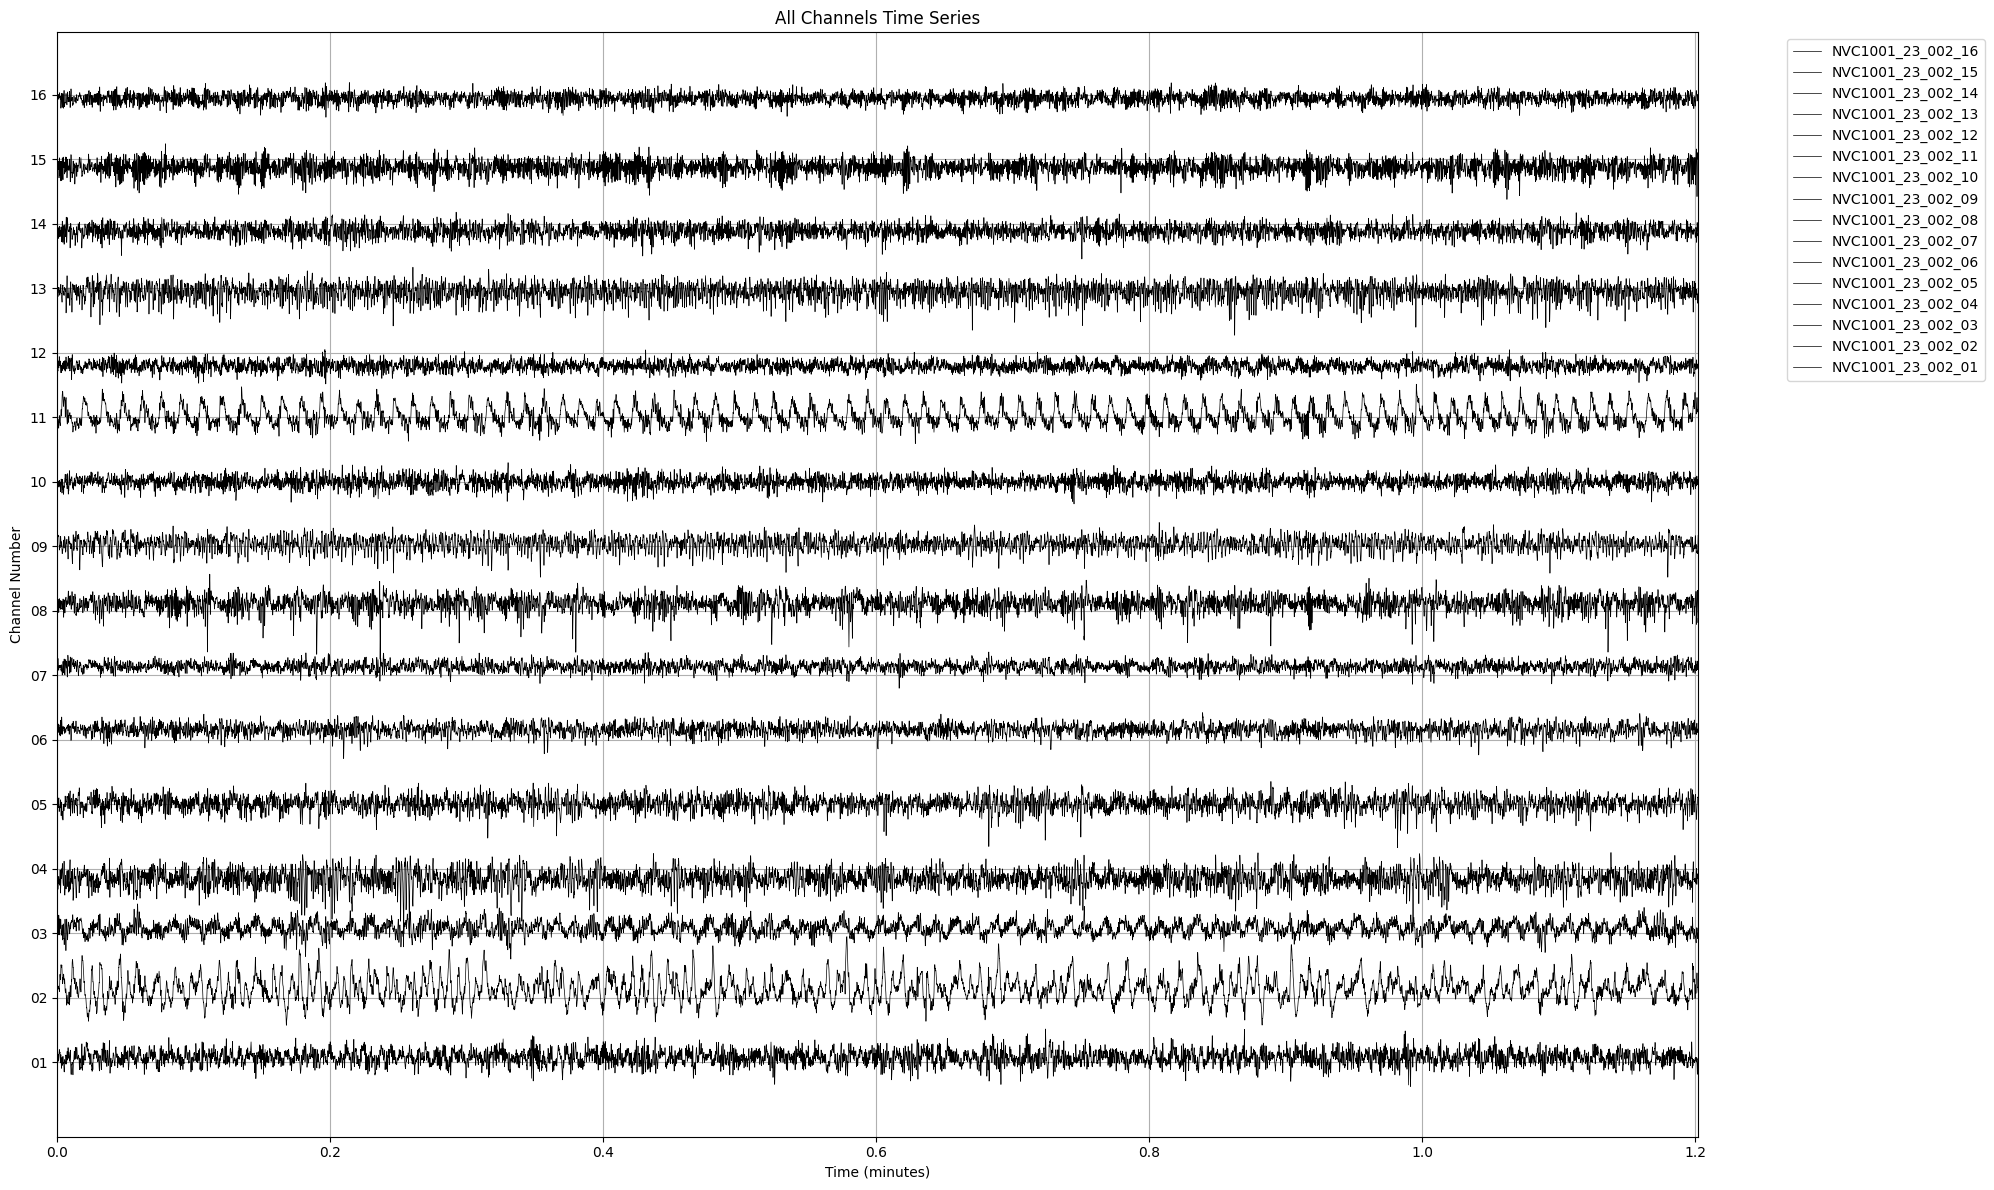

In [18]:
# Set how many minutes to plot (set to None for full dataset)
mins_to_plot = None  # Example: 10 for first 10 minutes, None for all data

plt.figure(figsize=(20, 12))

# Calculate time in minutes for x-axis
samples_per_min = fs * 60
time_minutes = np.arange(len(df)) / (fs * 60)  # Convert sample indices to minutes

# If mins_to_plot is specified, limit the data
if mins_to_plot is not None:
    samples_to_plot = int(mins_to_plot * samples_per_min)
    plot_data = df.iloc[:samples_to_plot]
    time_minutes = time_minutes[:samples_to_plot]
else:
    plot_data = df

# Plot each channel with offset
offset = 500  # Vertical spacing between channels
num_channels = len(df.columns)

plt.figure(figsize=(20, 12))
# Reverse the channel order to plot from bottom to top
for i, channel in enumerate(reversed(df.columns)):
    plt.plot(time_minutes, plot_data[channel] + (i * offset), label=channel, linewidth=0.5, color='k')

plt.title('All Channels Time Series')
plt.xlabel('Time (minutes)')
plt.ylabel('Channel Number')

# Adjust y-axis ticks to show channel numbers with leading zeros
y_ticks = np.arange(0, (num_channels * offset), offset)
y_labels = [f'{i:02d}' for i in range(1, num_channels + 1)]  # Create labels from 01 to 16
plt.yticks(y_ticks, y_labels)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xlim(0, duration_mins)
plt.tight_layout()